## Сорокин Вадим, 828


# Лабораторная работа 1.2

Исследование эффекта Комптона

In [1]:
import numpy as np
import scipy as sp
import scipy.optimize
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import splev, splrep
from scipy.interpolate import UnivariateSpline
import scipy.optimize 
from IPython.display import Image


### Цель работы:
С помощью сцинцилляционного спектрометра исследовать энергетический спектр $\gamma-$квантов, рассеянных на графите. Проверить справедливость соотношения $(1)$. Определить энергию рассянных $\gamma-$квантов в зависимости от угла рассеяния, а также энергию покоя частиц, на которых происходит комптоновское рассеяние.



### Оборудование:
Источник излучения $\sideset{_\text{ }^{137}}{}{\text{Cs}}$, испускающий лучи с энергией $662кэВ$, толстостенный свинцовый контейнер с коллиматором, графитовая мишень, сцинцилляционный счетчик, ЭВМ, лимб для отсчета угла поворота.


### Теоретическая справка:
#### Комптоновское рассеяние
Как было продемострировано Комптоном, в состав рассеянного рентгеновского и $\gamma$-излучения помимо исходной волны с частотой $\omega_0$  входит дополнительная длинноволновая компонента, отсутствующая в спектре первичного излучения. 

Гамма-излучения представляет собой поток фотонов, имеющих энергию $\hbar \omega$. 

Пусть $e^{-}$ покоился до соударения с энергией покоя $mc^2$ (мы считаем, что электрон в атоме является свободным), $\gamma$-квант имел начальную энергию $\hbar \omega_0$ и импульс $\hbar \omega_0/c$. После соударения $e^{-}$ приобретает энергию $\gamma mc^2$ и импульс $\gamma mv$. $\gamma$-квант при этом рассеивается на угол $\theta$ от своего направления движения и имеет энергию и импульс $\hbar \omega_1$, $\hbar \omega_1/c$.


Зпишем законы сохранения энергии и импульса:

\begin{equation*}
mc^2 = \hbar \omega_0 = \gamma m c^2 + \hbar \omega_1
\end{equation*}

\begin{equation*}
\frac{\hbar \omega_0}{c} = \gamma m v \cos \varphi + \frac{\hbar \omega_1}{c} \cos \theta
\end{equation*}

\begin{equation*}
\gamma m v \sin \varphi = \frac{\hbar \omega_1}{c} \sin \theta
\end{equation*}


Решим уравнения совместно и перейдем от частот к длинам волн. Тогда изменение длины волны рассеянного излучения равно:

\begin{equation}\label{eq:}
\Delta \lambda = \lambda_1 - \lambda_0 = \frac{h}{mc} (1-\cos \theta) = \Lambda_k (1-\cos \theta)
\end{equation}, 

где $\lambda_0$ и $\lambda_1$ - длины волн $\gamma-$кванта до и полсе рассения, $\Lambda_k = h/mc = 2.41 \cdot 10^{-10} cm$ - комптоновская длина волны электрона. 

Комптоновское смещение не зависит ни от длины волны первоначального излучени , ни от вещества, в котором происходит рассеяние. 

#### Рэлеевское рассеяние
В приведенном выводе электроны в атоме считались свободными. Такое упрощение допустимо, так как у рассматриваемых нами $\gamma$-квантов энергия составляет по порядку ~$10-10^2 кэВ$, в то время, как энергия связи в легких атомах имеет порядок ~$1 кэВ$. При рассеянии на связанных электронах изменение импульса кванта вопринимается атомом в целом. Поскольку масса атома очень велика, передача импульса не сопровождается заметной передачей энергии, и при этом наблюдается несмещенная (по энергии) компонента в спектре рассеянного излучения. Т.о., рассеяние $\gamma-$квантов на савязанных электронах можно рассматривать, как упругое столкновение квантов с атомом. Такое рассенияе называетяс \textbf{релеевским} и рассматривается, как процесс, при котором связанные электроны атома приходят в резонансное колебание под действием падающего электромагнитного излучения, а затем сами начинают излучать на той же самой частоте. При рассеянии часть электронов ведет себя, как свободные, а часть - как связанные. При этом одновременно наблюдаются и комптоновское и рэлеевское рассяния. 


Преобразуем формулу (1) от длин волн к энергии $\gamma-$квантов

\begin{equation}
    \frac{1}{\varepsilon(\theta)} - \frac{1}{\varepsilon_0} = 1 - \cos \theta
\end{equation}

$\varepsilon_0 = \frac{E_0}{mc^2}$ - энергия $\gamma-$квантов, падающих на рассеиватель, выраженная в единицах $mc^2$, $\varepsilon(\theta)$ - энергия квантов, испытывающих комптоновское рассеяние на угол $\theta$, $m$ - масса электрона.

### Экспериментальная установка

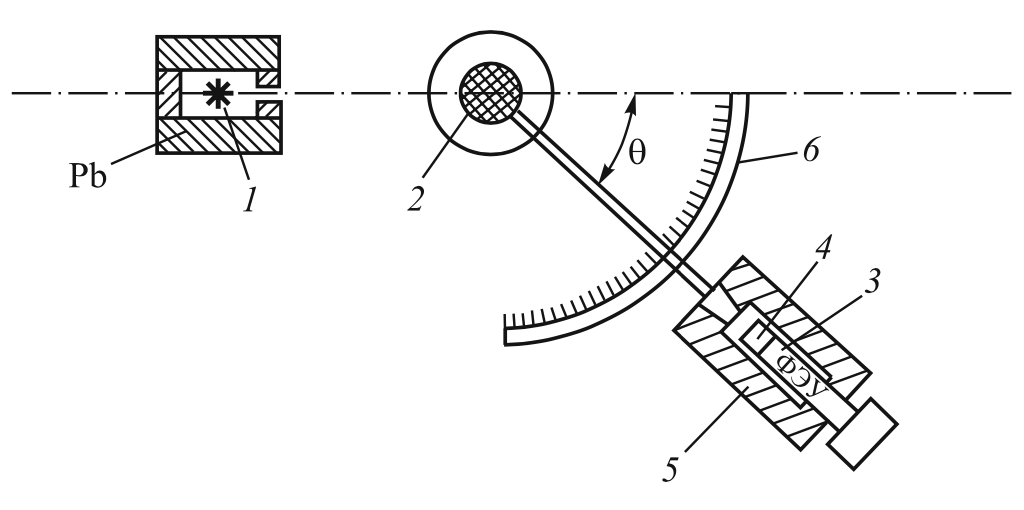

In [3]:
Image(filename='./pic.png', width=400) 

\begin{enumerate}
\item Источник излучения $\sideset{_\text{ }^{137}}{}{\text{Cs}}$
\item Графитовая мишень

\item Фотоэлектронный умножитель
\item Сцинциллятор
\item Свинцовый коллиматор
\item Лимб
\end{enumerate}


### Обработка результатов

Заменим в формуле (2) энергию квантов, испытавших комптоновское рассеяние на угол $\theta$, номером канала $N(\theta)$, соответствующего вершине фотопика при указанном угле $\theta$. Пусть $A$ - коэффициент пропорциональности между $\varepsilon(\theta)$ и $N(\theta)$.

\begin{equation}
    \frac{1}{N(\theta)} - \frac{1}{N(0)} = A(1 - \cos \theta)
\end{equation}

Снимем данные, занесем их в таблицу:

In [18]:
degr = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120])
N = np.array([899, 916, 837, 771, 702, 581, 531, 482, 434, 395, 370, 331, 312])

df = pd.DataFrame({
    '$\theta, ^o$': degr,
    '$N(\theta)$': N,
    '$1-\cos \theta$': np.ones(len(degr))-np.cos(np.radians(degr)),
    '$1/N(\theta)$': 1/N 
})

df

,"$\theta, ^o$",$N(\theta)$,$1-\cos \theta$,$1/N(\theta)$
0,0,899,0.000000,0.001112
1,10,916,0.015192,0.001092
2,20,837,0.060307,0.001195
3,30,771,0.133975,0.001297
4,40,702,0.233956,0.001425
5,50,581,0.357212,0.001721
6,60,531,0.500000,0.001883
7,70,482,0.657980,0.002075
8,80,434,0.826352,0.002304
9,90,395,1.000000,0.002532


Построим график:

In [21]:
def f(x, k, b):
    return k * x + b


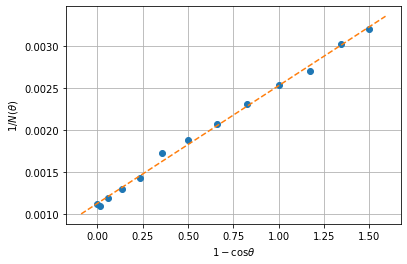

In [44]:
x = df['$1-\cos \theta$']
y = df['$1/N(\theta)$']

popt, pcov = sp.optimize.curve_fit(f, x, y)
perr = np.sqrt(np.diag(pcov))
sigma_k, sigma_b = perr
k, b = popt


x0 = np.linspace(np.min(x)-0.09, np.max(x)+0.09)

plt.plot(x, y, 'o')
plt.plot(x0, f(x0, k, b), '--')
plt.xlabel('$1-\cos θ$')
plt.ylabel('$1/N(θ)$')
plt.grid()

Вычислим величины $N_{наил}(0)$ и $N_{наил}(90)$:

In [42]:
N_best_0 = 1 / f(0, k, b)
N_best_90 = 1 / f(1, k, b) 

df0 = pd.DataFrame({
    '$N_{наил}(0)$': [N_best_0],
    '$N_{наил}(90)$': [N_best_90]
})

df0

,$N_{наил}(0)$,$N_{наил}(90)$
0,888.14754,395.770346


Оценим погрешность:

In [46]:
N_best_0_err = N_best_0 ** 2 * sigma_b
N_best_90_err = N_best_90 ** 2 * (sigma_k + sigma_b)


N_best_0_err, N_best_90_err

(15.634046343005595, 7.062303328212485)

Найдем энергию покоя частиц. Из формулы (2):

\begin{equation*}
mc^2 \Big( \frac{1}{E(90)} - \frac{1}{E(0)} \Big) = 1
\end{equation*}

или 

\begin{equation}
mc^2 = E(0) \frac{E(90)}{E(0) - E(90)} = E_{\gamma} \frac{N(90)}{N(0) - N(90)}
\end{equation}


$E(0) = E_{\gamma} = 662кэВ$ - энергия электронов, рассеянных вперед, - равна энергии $\gamma$-лучей, испускаемых источником.

In [49]:
mc2 =  662 * N_best_90 / (N_best_0 - N_best_90)
mc2_err = (N_best_0 * N_best_90_err + N_best_90 * N_best_0_err)/((N_best_0 - N_best_90)**2) / mc2
mc2, mc2_err, mc2_err * mc2 



(532.1123169947147, 0.051394575065537296, 27.34768641908184)

В итоге получаем, что 
\begin{equation*}
mc^2 \approx (532 \pm 27) кэВ
\end{equation*}

Что в пределах погрешности сходится с табличным значением:

\begin{equation*}
mc^2 = 0.511 МэВ
\end{equation*}
